# <font color=blue>FACIAL EMOTION RECOGNITION

## Classification of Human Expressions

The purpose of this Project is to build a Machine Learning model that will classify human expressions from a dataset of images.
For the Emotion Recognition we will be using the FER2013 (https://www.kaggle.com/msambare/fer2013) dataset, which consists of a set ot training and testing images of people expressing seven different emotions: anger, disgust, fear, happiness, neutrality, sadness and surprise.

The images were downloaded in a "jpg" format and, in this first part of the project, we will be working with the pixel "Gray-scale" values of each image.

Since we have seven different emotions, we are dealing with a classification problem, and we implemented three different classification algorithms in this proposal: Logistic Regression, KNN, SVC, Naive Bayes, OneVsRest and Decision Tree Classifier.

By looking at the number of total images we have for each facial expression, we can see that our classes and imbalanced, therefore we decided to down sample our dataset.

We performed F-test for feature selection.

For each machine learning algorithm we implemented Grid Search in order to find the optimal hyperparameters.

First we preprocessed our dataset by scaling all the pixel values of each image using MinMax Scaler, then we created single dataframes for each facial expression where each row represents one single image. We took care of the outliers of each 'facial expression' dataset by using IQR. We added the Label column "Expression" to each dataframe to indicate the target value to predict, and finally we concatenated all dataframes together before implementing the different algorithms.

The accuracy obtained from all models ranges from 26%-43%.
It could be improved by using a larger dataset.

### Imported Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics, svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

In [2]:
directories = {'Angry': './data/train/angry',
               'Disgust': './data/train/disgust',
               'Fear': './data/train/fear',
               'Happy': './data/train/happy',
               'Neutral': './data/train/neutral',
              'Sad': './data/train/sad',
              'Surprise':'./data/train/surprise'}


### Displaying a few samples from each class (facial expressions)

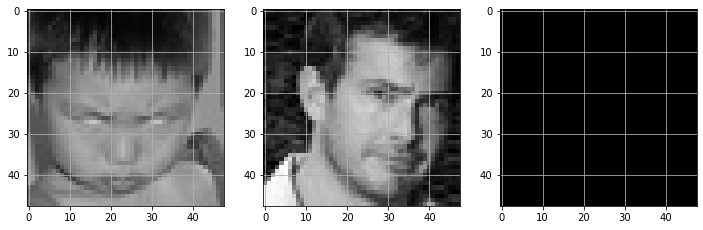

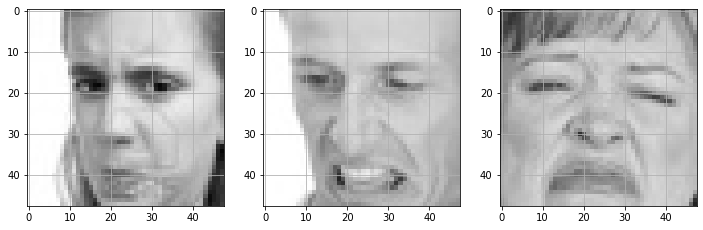

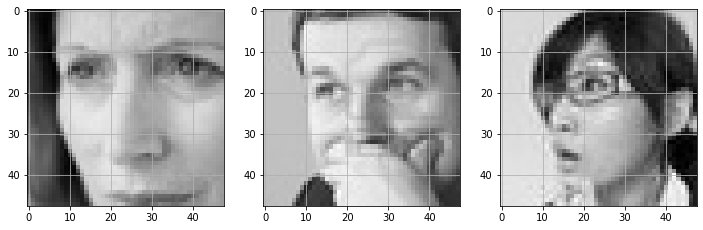

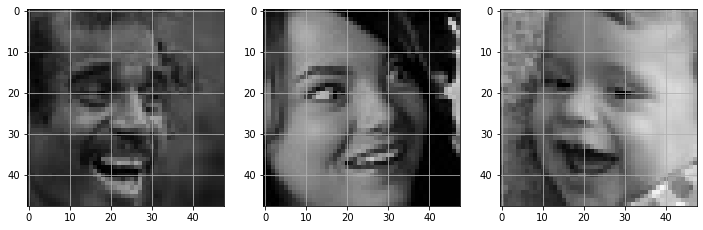

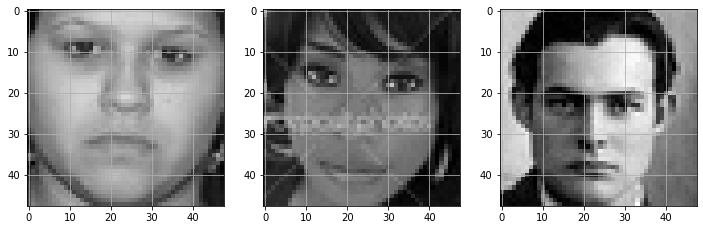

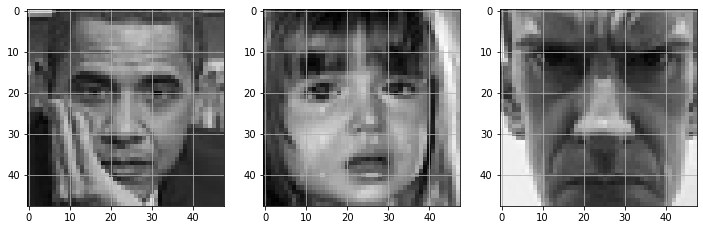

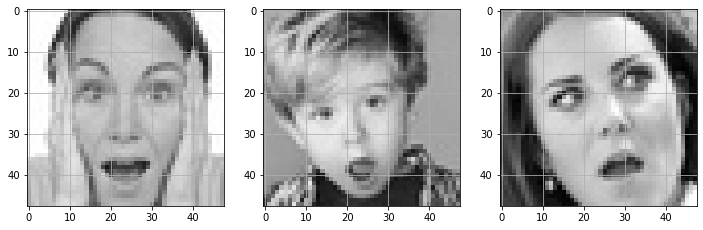

In [3]:
for path in directories.values():
    plt.figure(figsize= (12,12))
    for i in range(1, 4, 1):
        plt.subplot(1,3,i)
        img = Image.open(path+"/"+
                  os.listdir(path)[i]).convert("RGB")
        plt.grid(b=None)
        plt.imshow(img)   
    plt.show()

### Displaying the number of images in each class.

In [4]:
expressions={'Angry': len(os.listdir('./data/train/angry')), 'Disgust': len(os.listdir('./data/train/disgust')), 
         'Fear': len(os.listdir('./data/train/fear')), 'Happy': len(os.listdir('./data/train/happy')),
         'Neutral': len(os.listdir('./data/train/neutral')), 'Sad': len(os.listdir('./data/train/sad')),
         'Surprise': len(os.listdir('./data/train/surprise'))}
expressions

{'Angry': 3996,
 'Disgust': 436,
 'Fear': 4097,
 'Happy': 7215,
 'Neutral': 4965,
 'Sad': 4830,
 'Surprise': 3171}

### Bar Plot displaying the number of images from each class

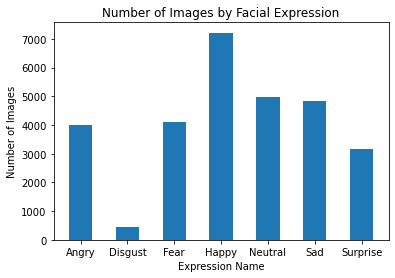

In [5]:
plt.bar(expressions.keys(), expressions.values(), width = .5);
plt.title("Number of Images by Facial Expression");
plt.xlabel('Expression Name');
plt.ylabel('Number of Images');

### Displaying the dimensions and pixels of 9 images from each class

In [6]:
## (As seen, each image is of the same size and have equal number of pixels)

for path in directories.values():
    for i in range(1, 10, 1):
        img = Image.open(path+"/"+
                  os.listdir(path)[i]).convert("RGB")
        width, height = img.size
        print (i, "Dimensions:", img.size, "Total pixels:", width * height)

1 Dimensions: (48, 48) Total pixels: 2304
2 Dimensions: (48, 48) Total pixels: 2304
3 Dimensions: (48, 48) Total pixels: 2304
4 Dimensions: (48, 48) Total pixels: 2304
5 Dimensions: (48, 48) Total pixels: 2304
6 Dimensions: (48, 48) Total pixels: 2304
7 Dimensions: (48, 48) Total pixels: 2304
8 Dimensions: (48, 48) Total pixels: 2304
9 Dimensions: (48, 48) Total pixels: 2304
1 Dimensions: (48, 48) Total pixels: 2304
2 Dimensions: (48, 48) Total pixels: 2304
3 Dimensions: (48, 48) Total pixels: 2304
4 Dimensions: (48, 48) Total pixels: 2304
5 Dimensions: (48, 48) Total pixels: 2304
6 Dimensions: (48, 48) Total pixels: 2304
7 Dimensions: (48, 48) Total pixels: 2304
8 Dimensions: (48, 48) Total pixels: 2304
9 Dimensions: (48, 48) Total pixels: 2304
1 Dimensions: (48, 48) Total pixels: 2304
2 Dimensions: (48, 48) Total pixels: 2304
3 Dimensions: (48, 48) Total pixels: 2304
4 Dimensions: (48, 48) Total pixels: 2304
5 Dimensions: (48, 48) Total pixels: 2304
6 Dimensions: (48, 48) Total pixel

### Creating a dataframe with all the "L" pixels values for all the images from the "angry" facial expression dataset

In [7]:
## We scaled all the values using MinMax Scaler
## In the following dataframe, each row represents a different image and eahc image has 2304 pixels

angry_list=[]
for i in range(1, 3996):
    img = Image.open(".\\data\\train\\angry\\"+
                  os.listdir(".\\data\\train\\angry\\")[i])
    colourArray = np.array(img.getdata())
    df = pd.DataFrame(colourArray.flatten().reshape(1,2304))
    angry_list.append(df)
angry_df=pd.concat(angry_list, ignore_index=True)

scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(angry_df)
angry_df_scaled = pd.DataFrame(arr_scaled, columns=angry_df.columns,index=angry_df.index)
angry_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.196078,0.125490,0.058824,0.043137,0.047059,0.039216,0.039216,0.031373,0.058824,0.039216,...,0.627451,0.615686,0.611765,0.596078,0.580392,0.592157,0.552941,0.560784,0.533333,0.325490
1,0.113725,0.094118,0.113725,0.043137,0.058824,0.086275,0.101961,0.043137,0.027451,0.066667,...,0.235294,0.427451,0.647059,0.580392,0.294118,0.192157,0.129412,0.058824,0.094118,0.094118
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.607843,0.541176,0.384314,0.439216,0.368627,0.380392,0.435294,0.419608,0.396078,0.329412,...,0.400000,0.380392,0.372549,0.360784,0.368627,0.396078,0.423529,0.435294,0.439216,0.427451
4,0.827451,0.843137,0.862745,0.866667,0.858824,0.847059,0.835294,0.823529,0.811765,0.803922,...,0.670588,0.666667,0.658824,0.635294,0.666667,0.662745,0.627451,0.623529,0.611765,0.596078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0.047059,0.047059,0.043137,0.047059,0.054902,0.074510,0.090196,0.098039,0.070588,0.054902,...,0.247059,0.458824,0.541176,0.627451,0.666667,0.654902,0.725490,0.713725,0.600000,0.568627
3991,0.419608,0.431373,0.439216,0.431373,0.396078,0.372549,0.364706,0.294118,0.278431,0.450980,...,0.431373,0.400000,0.258824,0.188235,0.203922,0.262745,0.274510,0.235294,0.254902,0.266667
3992,0.101961,0.074510,0.086275,0.090196,0.129412,0.215686,0.337255,0.494118,0.537255,0.564706,...,0.247059,0.152941,0.082353,0.145098,0.188235,0.141176,0.094118,0.090196,0.101961,0.070588
3993,0.984314,1.000000,0.960784,0.847059,0.701961,0.694118,0.552941,0.243137,0.113725,0.098039,...,0.749020,0.356863,0.011765,0.145098,0.180392,0.337255,0.568627,0.474510,0.482353,0.619608


In [8]:
## Showing the average variance, average standard deviation and average mean for the "angry" facial expression dataframe

variance_angry=angry_df_scaled.var()
std_angry=angry_df_scaled.std()
mean_angry=angry_df_scaled.mean()
print("Mean:",mean_angry.mean(), "Variance:",variance_angry.mean(), "Standard Deviation:", std_angry.mean())

Mean: 0.4950292522485692 Variance: 0.062345293544974104 Standard Deviation: 0.24750967447501823


#### Plotting box plot for outlier for one single feature ("Angry" facial expression)

<AxesSubplot:xlabel='500'>

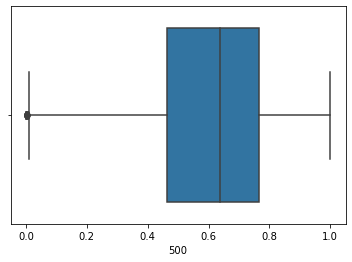

In [9]:
sns.boxplot(x=angry_df_scaled[500])

In [10]:
## Finding interquartile range for each feature
Q1 = angry_df_scaled.quantile(0.25)
Q3 = angry_df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       0.574510
1       0.545098
2       0.529412
3       0.505882
4       0.492157
          ...   
2299    0.482353
2300    0.498039
2301    0.505882
2302    0.525490
2303    0.521569
Length: 2304, dtype: float64


In [11]:
## Removing rows that include outliers for each feature by using IQR method
angry_df_scaled = angry_df_scaled[~((angry_df_scaled < (Q1 - 1.5 * IQR)) |(angry_df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
angry_df_scaled.shape

(3370, 2304)

### Creating a dataframe with all the "L" pixels values for all images from the "disgust" facial expression dataset 

In [12]:
## We scales all the values using MinMax Scaler
## In the following dataframe, each row represents a different image and eahc image has 2304 pixels

disgust_list=[]
for i in range(1, 436):
    img = Image.open(".\\data\\train\\disgust\\"+
                  os.listdir(".\\data\\train\\disgust\\")[i])
    colourArray = np.array(img.getdata())
    df = pd.DataFrame(colourArray.flatten().reshape(1,2304))
    disgust_list.append(df)
disgust_df=pd.concat(disgust_list, ignore_index=True)
scaler = MinMaxScaler() 
d_arr_scaled = scaler.fit_transform(disgust_df)
disgust_df_scaled = pd.DataFrame(d_arr_scaled, columns=disgust_df.columns,index=disgust_df.index)
disgust_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,0.992157,1.000000,0.807843,0.415686,...,0.587302,0.615686,0.596078,0.729412,0.690196,0.219608,0.070588,0.164706,0.156863,0.243137
1,0.996078,1.000000,0.992157,0.996078,0.701961,0.725490,0.788235,0.768627,0.768627,0.752941,...,0.746032,0.662745,0.717647,0.698039,0.643137,0.611765,0.623529,0.580392,0.568627,0.560784
2,0.286275,0.290196,0.286275,0.211765,0.211765,0.258824,0.309804,0.415686,0.411765,0.368627,...,0.841270,0.811765,0.803922,0.811765,0.800000,0.796078,0.752941,0.745098,0.407843,0.129412
3,0.192157,0.203922,0.160784,0.207843,0.176471,0.149020,0.121569,0.105882,0.141176,0.145098,...,0.781746,0.764706,0.752941,0.733333,0.776471,0.780392,0.870588,0.988235,0.972549,0.976471
4,0.066667,0.098039,0.196078,0.294118,0.352941,0.384314,0.392157,0.392157,0.392157,0.403922,...,0.626984,0.643137,0.643137,0.658824,0.654902,0.658824,0.639216,0.627451,0.329412,0.050980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.443137,0.439216,0.443137,0.447059,0.458824,0.447059,0.388235,0.321569,0.239216,0.164706,...,0.138889,0.137255,0.058824,0.101961,0.200000,0.247059,0.345098,0.407843,0.490196,0.560784
431,0.929412,0.862745,0.858824,0.858824,0.882353,0.894118,0.878431,0.870588,0.843137,0.811765,...,0.464286,0.454902,0.431373,0.427451,0.403922,0.447059,0.447059,0.470588,0.513725,0.517647
432,0.149020,0.172549,0.090196,0.121569,0.282353,0.411765,0.329412,0.219608,0.192157,0.262745,...,0.091270,0.035294,0.227451,0.341176,0.145098,0.184314,0.082353,0.105882,0.141176,0.145098
433,0.345098,0.227451,0.258824,0.309804,0.321569,0.392157,0.400000,0.298039,0.286275,0.345098,...,0.654762,0.662745,0.286275,0.278431,0.270588,0.274510,0.278431,0.278431,0.274510,0.270588


In [13]:
## Showing the average variance, average standard deviation and average mean for the "disgust" facial expression dataframe

variance_disgust=disgust_df_scaled.var()
std_disgust=disgust_df_scaled.std()
mean_disgust=disgust_df_scaled.mean()
print("Mean:",mean_disgust.mean(), "Variance:",variance_disgust.mean(), "Standard Deviation:", std_disgust.mean())

Mean: 0.528331723352213 Variance: 0.058542921198054536 Standard Deviation: 0.23900456107853657


#### Plotting box plot for outlier for one single feature ("Disgust" facial expression)

<AxesSubplot:xlabel='500'>

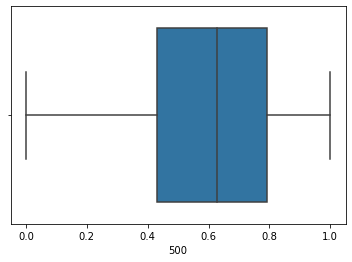

In [14]:
sns.boxplot(x=disgust_df_scaled[500])

In [15]:
## Finding interquartile range for each feature
Q1 = disgust_df_scaled.quantile(0.25)
Q3 = disgust_df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       0.570588
1       0.505882
2       0.494118
3       0.443137
4       0.425490
          ...   
2299    0.509804
2300    0.523529
2301    0.505882
2302    0.486275
2303    0.513725
Length: 2304, dtype: float64


In [16]:
## Removing rows that include outliers for each feature by using IQR method
disgust_df_scaled = disgust_df_scaled[~((disgust_df_scaled < (Q1 - 1.5 * IQR)) |(disgust_df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
disgust_df_scaled.shape

(309, 2304)

### Creating a dataframe with all the "L" pixels values for all images from the "fear" facial expression dataset 

In [17]:
## We scales all the values using MinMax Scaler
## In the following dataframe, each row represents a different image and eahc image has 2304 pixels

fear_list=[]
for i in range(1, 4097):
    img = Image.open(".\\data\\train\\fear\\"+
                  os.listdir(".\\data\\train\\fear\\")[i])
    colourArray = np.array(img.getdata())
    df = pd.DataFrame(colourArray.flatten().reshape(1,2304))
    fear_list.append(df)
fear_df=pd.concat(fear_list, ignore_index=True)
scaler = MinMaxScaler() 
f_arr_scaled = scaler.fit_transform(fear_df)
fear_df_scaled = pd.DataFrame(f_arr_scaled, columns=fear_df.columns,index=fear_df.index)
fear_df_scaled
  

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.149020,0.121569,0.074510,0.039216,0.019608,0.019608,0.121569,0.439216,0.662745,0.745098,...,0.525490,0.549020,0.549020,0.556863,0.564706,0.603922,0.639216,0.639216,0.623529,0.603922
1,0.768627,0.752941,0.760784,0.764706,0.752941,0.752941,0.792157,0.564706,0.384314,0.392157,...,0.662745,0.607843,0.525490,0.478431,0.450980,0.223529,0.172549,0.176471,0.184314,0.192157
2,0.854902,0.858824,0.854902,0.850980,0.847059,0.850980,0.854902,0.854902,0.850980,0.854902,...,0.545098,0.886275,0.913725,0.933333,0.952941,0.882353,0.952941,0.866667,0.176471,0.098039
3,0.682353,0.576471,0.431373,0.180392,0.364706,0.482353,0.533333,0.537255,0.556863,0.564706,...,0.062745,0.070588,0.058824,0.054902,0.070588,0.066667,0.070588,0.086275,0.082353,0.090196
4,0.772549,0.705882,0.803922,0.831373,0.596078,0.517647,0.525490,0.498039,0.431373,0.345098,...,0.168627,0.156863,0.152941,0.203922,0.286275,0.427451,0.768627,0.980392,0.980392,0.980392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.086275,0.094118,0.062745,0.050980,0.043137,0.094118,0.086275,0.011765,0.023529,0.015686,...,0.062745,0.066667,0.050980,0.066667,0.035294,0.027451,0.027451,0.023529,0.058824,0.098039
4092,0.992157,0.992157,0.886275,0.341176,0.278431,0.305882,0.309804,0.258824,0.207843,0.270588,...,0.439216,0.384314,0.341176,0.203922,0.082353,0.082353,0.082353,0.082353,0.082353,0.082353
4093,0.454902,0.384314,0.333333,0.305882,0.243137,0.176471,0.149020,0.149020,0.141176,0.121569,...,0.686275,0.976471,0.976471,0.972549,0.945098,0.901961,0.827451,0.780392,0.635294,0.478431
4094,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,...,0.925490,0.925490,0.945098,0.937255,0.937255,0.933333,0.937255,0.917647,0.721569,0.756863


In [18]:
## Showing the average variance, average standard deviation and average mean for the "fear" facial expression dataframe

variance_fear=fear_df_scaled.var()
std_fear=fear_df_scaled.std()
mean_fear=fear_df_scaled.mean()
print("Mean:",mean_fear.mean(), "Variance:",variance_fear.mean(), "Standard Deviation:", std_fear.mean())

Mean: 0.5314383994949257 Variance: 0.062053218214527556 Standard Deviation: 0.24638709734045813


#### Plotting box plot for outlier for one single feature ("Fear" facial expression)

<AxesSubplot:xlabel='500'>

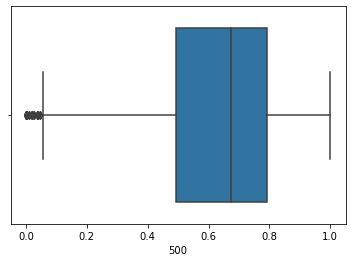

In [19]:
sns.boxplot(x=fear_df_scaled[500])

In [20]:
## Finding interquartile range for each feature
Q1 = fear_df_scaled.quantile(0.25)
Q3 = fear_df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       0.620588
1       0.592157
2       0.564706
3       0.552941
4       0.533333
          ...   
2299    0.533333
2300    0.537255
2301    0.552941
2302    0.561765
2303    0.580392
Length: 2304, dtype: float64


In [21]:
## Removing rows that include outliers for each feature by using IQR method
fear_df_scaled = fear_df_scaled[~((fear_df_scaled < (Q1 - 1.5 * IQR)) |(fear_df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
fear_df_scaled.shape

(2954, 2304)

### Creating a dataframe with all the "L" pixels values for all images from the "happy" facial expression dataset

In [22]:
## We scales all the values using MinMax Scaler
## In the following dataframe, each row represents a different image and eahc image has 2304 pixels

happy_list=[]
for i in range(1, 7215):
    img = Image.open(".\\data\\train\\happy\\"+
                  os.listdir(".\\data\\train\\happy\\")[i])
    colourArray = np.array(img.getdata())
    df = pd.DataFrame(colourArray.flatten().reshape(1,2304))
    happy_list.append(df)
happy_df=pd.concat(happy_list, ignore_index=True)
scaler = MinMaxScaler() 
h_arr_scaled = scaler.fit_transform(happy_df)
happy_df_scaled = pd.DataFrame(h_arr_scaled, columns=happy_df.columns,index=happy_df.index)
happy_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.164706,0.219608,0.235294,0.250980,0.235294,0.282353,0.301961,0.325490,0.376471,0.427451,...,0.125490,0.117647,0.121569,0.109804,0.098039,0.090196,0.094118,0.101961,0.109804,0.105882
1,0.058824,0.050980,0.054902,0.101961,0.082353,0.176471,0.301961,0.356863,0.423529,0.482353,...,0.003922,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.007843
2,0.596078,0.517647,0.517647,0.576471,0.682353,0.615686,0.537255,0.482353,0.545098,0.619608,...,0.611765,0.780392,0.776471,0.796078,0.807843,0.968627,0.937255,0.745098,0.666667,0.682353
3,0.988235,0.996078,1.000000,0.988235,0.988235,0.972549,0.913725,0.854902,0.815686,0.705882,...,0.878431,0.882353,0.964706,0.945098,0.933333,0.925490,0.909804,0.917647,0.929412,0.925490
4,0.113725,0.101961,0.098039,0.094118,0.098039,0.098039,0.098039,0.094118,0.098039,0.086275,...,0.584314,0.607843,0.494118,0.113725,0.270588,0.443137,0.670588,0.713725,0.600000,0.356863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,0.133333,0.121569,0.129412,0.090196,0.109804,0.172549,0.219608,0.207843,0.192157,0.192157,...,0.486275,0.560784,0.301961,0.133333,0.164706,0.160784,0.149020,0.164706,0.164706,0.156863
7210,0.023529,0.023529,0.054902,0.094118,0.235294,0.584314,0.756863,0.756863,0.788235,0.807843,...,0.698039,0.666667,0.635294,0.615686,0.603922,0.564706,0.486275,0.462745,0.474510,0.525490
7211,0.760784,0.764706,0.780392,0.788235,0.756863,0.384314,0.380392,0.560784,0.678431,0.756863,...,0.925490,0.905882,0.894118,0.878431,0.850980,0.819608,0.780392,0.717647,0.654902,0.627451
7212,0.929412,0.933333,0.952941,0.862745,0.807843,0.792157,0.745098,0.737255,0.686275,0.470588,...,0.843137,0.827451,0.839216,0.843137,0.854902,0.878431,0.898039,0.905882,0.901961,0.898039


In [23]:
## Showing the average variance, average standard deviation and average mean for the "happy" facial expression dataframe

variance_happy=happy_df_scaled.var()
std_happy=happy_df_scaled.std()
mean_happy=happy_df_scaled.mean()
print("Mean:",mean_happy.mean(), "Variance:",variance_happy.mean(), "Standard Deviation:", std_happy.mean())

Mean: 0.5076120981605444 Variance: 0.05733949236158445 Standard Deviation: 0.23697176907081235


#### Plotting box plot for outlier for one single feature ("Happy" facial expression)

<AxesSubplot:xlabel='500'>

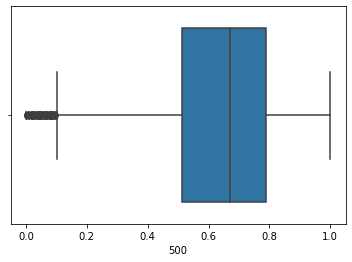

In [24]:
sns.boxplot(x=happy_df_scaled[500])

In [25]:
## Finding interquartile range for each feature
Q1 = happy_df_scaled.quantile(0.25)
Q3 = happy_df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       0.549020
1       0.529412
2       0.509804
3       0.494118
4       0.482353
          ...   
2299    0.486275
2300    0.498039
2301    0.509804
2302    0.501961
2303    0.513725
Length: 2304, dtype: float64


In [26]:
## Removing rows that include outliers for each feature by using IQR method
happy_df_scaled = happy_df_scaled[~((happy_df_scaled < (Q1 - 1.5 * IQR)) |(happy_df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
happy_df_scaled.shape

(5397, 2304)

### Creating a dataframe with all the "L" pixels values for all images from the "neutral" facial expression dataset

In [27]:
## We scales all the values using MinMax Scaler
## In the following dataframe, each row represents a different image and eahc image has 2304 pixels

neutral_list=[]
for i in range(1, 4965):
    img = Image.open(".\\data\\train\\neutral\\"+
                  os.listdir(".\\data\\train\\neutral\\")[i])
    colourArray = np.array(img.getdata())
    df = pd.DataFrame(colourArray.flatten().reshape(1,2304))
    neutral_list.append(df)
neutral_df=pd.concat(neutral_list, ignore_index=True)
scaler = MinMaxScaler() 
n_arr_scaled = scaler.fit_transform(neutral_df)
neutral_df_scaled = pd.DataFrame(n_arr_scaled, columns=neutral_df.columns,index=neutral_df.index)
neutral_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.015686,0.007843,0.050980,0.345098,0.443137,0.427451,0.490196,0.501961,0.545098,0.580392,...,0.525490,0.513725,0.431373,0.368627,0.266667,0.172549,0.078431,0.094118,0.121569,0.101961
1,0.760784,0.286275,0.207843,0.156863,0.137255,0.149020,0.172549,0.133333,0.101961,0.086275,...,0.176471,0.066667,0.050980,0.066667,0.074510,0.058824,0.062745,0.074510,0.074510,0.066667
2,0.807843,0.788235,0.803922,0.792157,0.764706,0.776471,0.803922,0.803922,0.827451,0.670588,...,0.415686,0.407843,0.380392,0.423529,0.427451,0.435294,0.403922,0.364706,0.360784,0.317647
3,0.866667,0.862745,0.847059,0.831373,0.823529,0.800000,0.772549,0.752941,0.776471,0.749020,...,0.180392,0.192157,0.192157,0.168627,0.168627,0.231373,0.254902,0.254902,0.274510,0.266667
4,0.054902,0.062745,0.070588,0.058824,0.062745,0.074510,0.054902,0.043137,0.058824,0.078431,...,0.050980,0.050980,0.070588,0.133333,0.094118,0.035294,0.031373,0.031373,0.039216,0.050980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,0.615686,0.682353,0.713725,0.509804,0.086275,0.113725,0.156863,0.239216,0.282353,0.337255,...,0.819608,0.901961,0.905882,0.854902,0.882353,0.905882,0.905882,0.862745,0.870588,0.913725
4960,0.231373,0.215686,0.200000,0.192157,0.168627,0.129412,0.094118,0.074510,0.066667,0.050980,...,0.203922,0.215686,0.219608,0.219608,0.211765,0.203922,0.203922,0.207843,0.211765,0.207843
4961,0.003922,0.388235,0.603922,0.580392,0.611765,0.666667,0.725490,0.745098,0.745098,0.749020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4962,0.184314,0.078431,0.196078,0.247059,0.325490,0.321569,0.403922,0.305882,0.396078,0.533333,...,0.392157,0.345098,0.345098,0.329412,0.325490,0.345098,0.360784,0.352941,0.262745,0.113725


In [28]:
## Showing the average variance, average standard deviation and average mean for the "neutral" facial expression dataframe

variance_neutral=neutral_df_scaled.var()
std_neutral=neutral_df_scaled.std()
mean_neutral=neutral_df_scaled.mean()
print("Mean:",mean_neutral.mean(), "Variance:",variance_neutral.mean(), "Standard Deviation:", std_neutral.mean())

Mean: 0.4859162466413545 Variance: 0.060805420830893464 Standard Deviation: 0.2446045386013093


#### Plotting box plot for outlier for one single feature ("Neutral" facial expression)

<AxesSubplot:xlabel='500'>

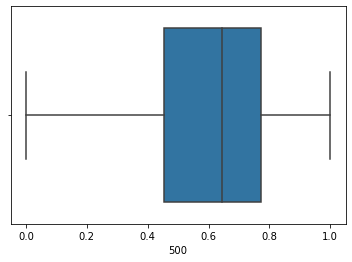

In [29]:
sns.boxplot(x=neutral_df_scaled[500])

In [30]:
## Finding interquartile range for each feature
Q1 = neutral_df_scaled.quantile(0.25)
Q3 = neutral_df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       0.533333
1       0.513725
2       0.498039
3       0.470588
4       0.443137
          ...   
2299    0.494118
2300    0.501961
2301    0.517647
2302    0.525490
2303    0.537255
Length: 2304, dtype: float64


In [31]:
## Removing rows that include outliers for each feature by using IQR method
neutral_df_scaled = neutral_df_scaled[~((neutral_df_scaled < (Q1 - 1.5 * IQR)) |(neutral_df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
neutral_df_scaled.shape

(4496, 2304)

### Creating a dataframe with all the "L" pixels values for all images from the "sad" facial expression dataset

In [32]:
## We scales all the values using MinMax Scaler
## In the following dataframe, each row represents a different image and eahc image has 2304 pixels

sad_list=[]
for i in range(1, 4830):
    img = Image.open(".\\data\\train\\sad\\"+
                  os.listdir(".\\data\\train\\sad\\")[i])
    colourArray = np.array(img.getdata())
    df = pd.DataFrame(colourArray.flatten().reshape(1,2304))
    sad_list.append(df)
sad_df=pd.concat(sad_list, ignore_index=True)
scaler = MinMaxScaler() 
s_arr_scaled = scaler.fit_transform(sad_df)
sad_df_scaled = pd.DataFrame(s_arr_scaled, columns=sad_df.columns,index=sad_df.index)
sad_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.870588,0.847059,0.878431,0.858824,0.847059,0.874510,0.407843,0.133333,0.211765,0.192157,...,0.149020,0.172549,0.188235,0.180392,0.172549,0.164706,0.168627,0.172549,0.172549,0.168627
1,0.376471,0.360784,0.243137,0.152941,0.211765,0.137255,0.137255,0.196078,0.086275,0.082353,...,0.250980,0.486275,0.607843,0.525490,0.431373,0.435294,0.560784,0.321569,0.407843,0.643137
2,0.380392,0.294118,0.545098,0.639216,0.501961,0.447059,0.474510,0.513725,0.560784,0.498039,...,0.372549,0.407843,0.521569,0.580392,0.866667,0.898039,0.886275,0.901961,0.894118,0.894118
3,0.498039,0.580392,0.631373,0.603922,0.607843,0.490196,0.337255,0.188235,0.239216,0.341176,...,0.243137,0.188235,0.156863,0.188235,0.235294,0.227451,0.239216,0.270588,0.270588,0.262745
4,0.439216,0.494118,0.541176,0.552941,0.556863,0.564706,0.576471,0.592157,0.592157,0.600000,...,0.737255,0.729412,0.729412,0.725490,0.717647,0.717647,0.721569,0.725490,0.725490,0.729412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,0.435294,0.450980,0.533333,0.521569,0.541176,0.482353,0.490196,0.670588,0.686275,0.674510,...,0.098039,0.129412,0.137255,0.149020,0.160784,0.176471,0.188235,0.196078,0.192157,0.160784
4825,0.400000,0.505882,0.337255,0.254902,0.133333,0.145098,0.203922,0.203922,0.172549,0.156863,...,0.019608,0.035294,0.023529,0.007843,0.000000,0.035294,0.050980,0.019608,0.000000,0.000000
4826,0.023529,0.047059,0.003922,0.000000,0.043137,0.078431,0.094118,0.149020,0.180392,0.200000,...,0.062745,0.129412,0.054902,0.003922,0.003922,0.003922,0.019608,0.003922,0.019608,0.019608
4827,0.125490,0.129412,0.137255,0.125490,0.141176,0.121569,0.058824,0.066667,0.101961,0.192157,...,0.188235,0.411765,0.541176,0.478431,0.466667,0.505882,0.509804,0.498039,0.498039,0.498039


In [33]:
## Showing the average variance, average standard deviation and average mean for the "sad" facial expression dataframe

variance_sad=sad_df_scaled.var()
std_sad=sad_df_scaled.std()
mean_sad=sad_df_scaled.mean()
print("Mean:",mean_sad.mean(), "Variance:",variance_sad.mean(), "Standard Deviation:", std_sad.mean())

Mean: 0.47558998323384366 Variance: 0.061867310229933886 Standard Deviation: 0.24728099394742767


#### Plotting box plot for outlier for one single feature ("Sad" facial expression)

<AxesSubplot:xlabel='500'>

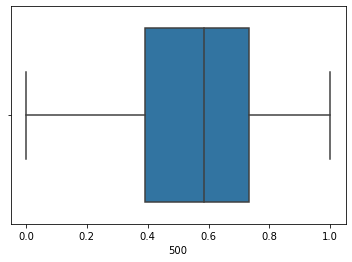

In [34]:
sns.boxplot(x=sad_df_scaled[500])

In [35]:
## Finding interquartile range for each feature
Q1 = sad_df_scaled.quantile(0.25)
Q3 = sad_df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       0.533333
1       0.517647
2       0.501961
3       0.494118
4       0.474510
          ...   
2299    0.486275
2300    0.490196
2301    0.494118
2302    0.501961
2303    0.501961
Length: 2304, dtype: float64


In [36]:
## Removing rows that include outliers for each feature by using IQR method
sad_df_scaled = sad_df_scaled[~((sad_df_scaled < (Q1 - 1.5 * IQR)) |(sad_df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
sad_df_scaled.shape

(4630, 2304)

### Creating a dataframe with all the "L" pixels values for all images from the "surprise" facial expression dataset

In [37]:
## We scales all the values using MinMax Scaler
## In the following dataframe, each row represents a different image and eahc image has 2304 pixels

surprise_list=[]
for i in range(1, 3171):
    img = Image.open(".\\data\\train\\surprise\\"+
                  os.listdir(".\\data\\train\\surprise\\")[i])
    colourArray = np.array(img.getdata())
    df = pd.DataFrame(colourArray.flatten().reshape(1,2304))
    surprise_list.append(df)
surprise_df=pd.concat(surprise_list, ignore_index=True)
scaler = MinMaxScaler() 
su_arr_scaled = scaler.fit_transform(surprise_df)
surprise_df_scaled = pd.DataFrame(su_arr_scaled, columns=surprise_df.columns,index=surprise_df.index)
surprise_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,1.000000,1.000000,1.000000,0.996078,0.992157,1.000000,0.988235,0.992157,0.996078,0.901961,...,0.827451,0.807843,0.760784,0.615686,0.737255,0.780392,0.705882,0.788235,0.745098,0.643137
1,0.670588,0.666667,0.674510,0.662745,0.686275,0.686275,0.658824,0.670588,0.505882,0.278431,...,0.403922,0.721569,0.454902,0.301961,0.262745,0.286275,0.541176,0.419608,0.329412,0.521569
2,0.513725,0.541176,0.513725,0.576471,0.647059,0.443137,0.396078,0.396078,0.380392,0.364706,...,0.788235,0.721569,0.584314,0.568627,0.486275,0.490196,0.803922,0.956863,0.996078,0.996078
3,0.819608,0.850980,0.866667,0.862745,0.878431,0.854902,0.694118,0.380392,0.384314,0.431373,...,0.937255,0.949020,0.909804,0.780392,0.525490,0.462745,0.368627,0.313725,0.231373,0.266667
4,0.207843,0.298039,0.313725,0.270588,0.290196,0.313725,0.313725,0.278431,0.309804,0.325490,...,0.356863,0.301961,0.235294,0.156863,0.278431,0.380392,0.313725,0.258824,0.172549,0.305882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,0.105882,0.101961,0.101961,0.101961,0.105882,0.105882,0.109804,0.109804,0.129412,0.133333,...,0.192157,0.192157,0.180392,0.176471,0.168627,0.160784,0.152941,0.145098,0.145098,0.141176
3166,0.027451,0.023529,0.050980,0.152941,0.298039,0.227451,0.113725,0.082353,0.062745,0.078431,...,0.533333,0.600000,0.611765,0.623529,0.905882,1.000000,1.000000,1.000000,0.988235,1.000000
3167,0.486275,0.505882,0.490196,0.482353,0.505882,0.501961,0.498039,0.501961,0.513725,0.274510,...,0.564706,0.772549,1.000000,0.972549,0.984314,0.988235,0.980392,0.980392,0.952941,0.984314
3168,0.949020,0.949020,0.949020,0.847059,0.431373,0.164706,0.078431,0.160784,0.145098,0.054902,...,0.568627,0.745098,0.839216,0.890196,0.572549,0.545098,0.584314,0.666667,0.764706,0.796078


In [38]:
## Showing the average variance, average standard deviation and average mean for the "surprise" facial expression dataframe

variance_surprise=surprise_df_scaled.var()
std_surprise=surprise_df_scaled.std()
mean_surprise=surprise_df_scaled.mean()
print("Mean:",mean_surprise.mean(), "Variance:",variance_surprise.mean(), "Standard Deviation:", std_surprise.mean())

Mean: 0.5735830701463492 Variance: 0.060116410705362174 Standard Deviation: 0.2403558753481196


#### Plotting box plot for outlier for one single feature ("Surprise" facial expression)

<AxesSubplot:xlabel='500'>

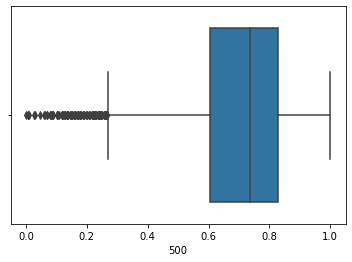

In [39]:
sns.boxplot(x=surprise_df_scaled[500])

In [40]:
## Finding interquartile range for each feature
Q1 = surprise_df_scaled.quantile(0.25)
Q3 = surprise_df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       0.678431
1       0.662745
2       0.623529
3       0.603922
4       0.576471
          ...   
2299    0.552941
2300    0.560784
2301    0.592157
2302    0.600000
2303    0.609804
Length: 2304, dtype: float64


In [41]:
## Removing rows that include outliers for each feature by using IQR method
surprise_df_scaled = surprise_df_scaled[~((surprise_df_scaled < (Q1 - 1.5 * IQR)) |(surprise_df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
surprise_df_scaled.shape

(1364, 2304)

In [42]:
## To each facial expression dataframe we added another column,"Expression", which represents the target labels
##{"Angry":1, "Disgust":2, "Fear":3, "Happy":4, "Neutral":5, "Sad":6, "Surprise":7}

angry_df_scaled["Expression"] = 1
disgust_df_scaled["Expression"] = 2
fear_df_scaled["Expression"] = 3
happy_df_scaled["Expression"] = 4
neutral_df_scaled["Expression"] = 5
sad_df_scaled["Expression"] = 6
surprise_df_scaled["Expression"] = 7

<ipython-input-42-3f4d26427195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angry_df_scaled["Expression"] = 1
<ipython-input-42-3f4d26427195>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disgust_df_scaled["Expression"] = 2
<ipython-input-42-3f4d26427195>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

### We concatenated all the dataframes into one single dataframe

In [43]:
expressions_df = [angry_df_scaled, disgust_df_scaled, fear_df_scaled, happy_df_scaled, neutral_df_scaled, sad_df_scaled, surprise_df_scaled]
result = pd.concat(expressions_df)
result

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Expression
1,0.113725,0.094118,0.113725,0.043137,0.058824,0.086275,0.101961,0.043137,0.027451,0.066667,...,0.427451,0.647059,0.580392,0.294118,0.192157,0.129412,0.058824,0.094118,0.094118,1
3,0.607843,0.541176,0.384314,0.439216,0.368627,0.380392,0.435294,0.419608,0.396078,0.329412,...,0.380392,0.372549,0.360784,0.368627,0.396078,0.423529,0.435294,0.439216,0.427451,1
4,0.827451,0.843137,0.862745,0.866667,0.858824,0.847059,0.835294,0.823529,0.811765,0.803922,...,0.666667,0.658824,0.635294,0.666667,0.662745,0.627451,0.623529,0.611765,0.596078,1
5,0.141176,0.145098,0.133333,0.156863,0.211765,0.254902,0.262745,0.223529,0.188235,0.196078,...,0.635294,0.356863,0.196078,0.200000,0.152941,0.050980,0.058824,0.137255,0.125490,1
6,0.133333,0.121569,0.125490,0.121569,0.098039,0.117647,0.156863,0.160784,0.156863,0.145098,...,0.376471,0.364706,0.368627,0.396078,0.427451,0.400000,0.498039,0.447059,0.098039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,0.992157,0.992157,0.996078,0.992157,0.666667,0.396078,0.411765,0.400000,0.333333,0.356863,...,0.788235,0.725490,0.694118,0.698039,0.729412,0.603922,0.098039,0.109804,0.090196,7
3158,0.988235,0.968627,0.572549,0.364706,0.368627,0.349020,0.388235,0.368627,0.364706,0.325490,...,0.741176,0.772549,0.807843,0.341176,0.074510,0.156863,0.031373,0.070588,0.435294,7
3160,0.176471,0.141176,0.164706,0.137255,0.129412,0.113725,0.552941,0.737255,0.725490,0.654902,...,0.835294,0.850980,0.886275,0.905882,0.945098,0.764706,0.843137,0.921569,0.960784,7
3162,0.984314,1.000000,0.980392,1.000000,1.000000,0.952941,0.913725,0.886275,0.913725,0.921569,...,0.752941,0.764706,0.764706,0.741176,0.725490,0.470588,0.372549,0.713725,0.858824,7


In [44]:
## We shuffled all the rows of the final dataframe

df_shuffled = shuffle(result)
df_shuffled=df_shuffled.reset_index(drop=True)
df_shuffled

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Expression
0,0.509804,0.505882,0.517647,0.415686,0.352941,0.345098,0.274510,0.345098,0.231373,0.270588,...,0.125490,0.690196,0.796078,0.443137,0.301961,0.203922,0.149020,0.400000,0.501961,5
1,0.325490,0.423529,0.431373,0.266667,0.203922,0.282353,0.423529,0.415686,0.349020,0.341176,...,0.235294,0.239216,0.247059,0.250980,0.254902,0.258824,0.262745,0.262745,0.262745,1
2,1.000000,1.000000,0.988235,1.000000,0.996078,1.000000,0.988235,1.000000,0.929412,0.415686,...,0.301961,0.325490,0.364706,0.372549,0.180392,0.254902,0.423529,0.478431,0.450980,3
3,0.423529,0.427451,0.439216,0.450980,0.454902,0.450980,0.454902,0.462745,0.458824,0.470588,...,0.235294,0.247059,0.270588,0.309804,0.345098,0.364706,0.380392,0.407843,0.427451,3
4,0.705882,0.780392,0.796078,0.839216,0.882353,0.933333,0.964706,0.976471,0.984314,0.949020,...,0.121569,0.121569,0.117647,0.098039,0.078431,0.031373,0.043137,0.062745,0.090196,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22515,0.109804,0.113725,0.125490,0.141176,0.207843,0.172549,0.145098,0.164706,0.145098,0.152941,...,0.490196,0.321569,0.517647,0.815686,0.819608,0.854902,0.823529,0.541176,0.290196,6
22516,0.172549,0.145098,0.109804,0.074510,0.074510,0.082353,0.090196,0.207843,0.411765,0.639216,...,0.533333,0.501961,0.635294,0.674510,0.509804,0.505882,0.631373,0.733333,0.823529,4
22517,0.478431,0.494118,0.513725,0.513725,0.533333,0.560784,0.545098,0.545098,0.517647,0.411765,...,0.462745,0.458824,0.458824,0.458824,0.458824,0.458824,0.458824,0.458824,0.458824,5
22518,0.035294,0.047059,0.027451,0.027451,0.023529,0.007843,0.019608,0.003922,0.121569,0.470588,...,0.576471,0.631373,0.647059,0.682353,0.709804,0.741176,0.780392,0.776471,0.729412,5


In [45]:
df_shuffled.isnull().values.any()

False

In [46]:
X = df_shuffled.drop(columns=["Expression"])
y = df_shuffled["Expression"]

In [47]:
Counter(y)

Counter({5: 4496, 1: 3370, 3: 2954, 4: 5397, 6: 4630, 2: 309, 7: 1364})

In [48]:
rus = RandomUnderSampler(replacement=False)
X_balanced, y_balanced = rus.fit_resample(X, y)
print(X.shape)
print(X_balanced.shape)

(22520, 2304)
(2163, 2304)


In [49]:
Counter(y_balanced)

Counter({1: 309, 2: 309, 3: 309, 4: 309, 5: 309, 6: 309, 7: 309})

### Performing feature selection using F-test 

##### (We got the same results by implementing chi-2 test)

In [50]:
X_fs = SelectKBest(score_func=f_classif, k='all').fit_transform(X_balanced, y_balanced)
print(X_fs.shape)

(2163, 2304)


In [51]:
# split X and y into training and testing sets
# 70% data --> training      30% data--> testing
X_train, X_test, y_train, y_test = train_test_split(X_fs, y_balanced, stratify=y_balanced, test_size=0.3, random_state=42)

# Showing the number of images for each class in the testing dataset
y_test.value_counts()

3    93
4    93
5    93
6    93
7    93
1    92
2    92
Name: Expression, dtype: int64

### Logistic Regression Classifier

In [52]:
# We implement multinomial LogisticRegression with 'lbgfs' solver which respects the softmax activation function

clf_lr = LogisticRegression()
param_grid_lr = {'penalty' : ['none','l1', 'l2','elasticnet'],
     'C' : [100, 10, 1.0,0.1,0.01],
     'solver' : ['newton-cg','liblinear']}

classifier_lr = GridSearchCV(estimator=clf_lr, param_grid = param_grid_lr, cv = 5, verbose=True, n_jobs=-1)
clf_lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [53]:
classifier_lr.fit(X_train, y_train)
y_pred_lr=classifier_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Mary\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.34018097        nan        nan 0.34875309 0.35866938 0.34611282
        nan        nan 0.34018097        nan        nan 0.35997858
 0.36394772 0.35206216        nan        nan 0.34018097        nan
        nan 0.40622036 0.37319083 0.371215          nan        nan
 0.34018097        nan        nan 0.27410443 0.38639215 0.37977838
        nan        nan 0.34018097        nan        nan 0.14200817
 0.35666514 0.33617249        nan        nan]
  warnings.warn(


              precision    recall  f1-score   support

           1       0.30      0.26      0.28        92
           2       0.80      0.89      0.84        92
           3       0.29      0.24      0.26        93
           4       0.32      0.39      0.35        93
           5       0.29      0.27      0.28        93
           6       0.31      0.28      0.30        93
           7       0.51      0.60      0.55        93

    accuracy                           0.42       649
   macro avg       0.40      0.42      0.41       649
weighted avg       0.40      0.42      0.41       649



### KNN Classifier

In [54]:
clf_knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21],
         'metric' : ['euclidean','manhattan','minkowski']
     }

classifier_knn = GridSearchCV(estimator=clf_knn, param_grid = param_grid_knn, cv = 5, verbose=True, n_jobs=-1)
clf_knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [55]:
classifier_knn.fit(X_train, y_train)
y_pred_knn=classifier_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

Fitting 5 folds for each of 33 candidates, totalling 165 fits
              precision    recall  f1-score   support

           1       0.18      0.12      0.14        92
           2       0.44      0.61      0.51        92
           3       0.19      0.14      0.16        93
           4       0.22      0.26      0.24        93
           5       0.23      0.28      0.25        93
           6       0.27      0.17      0.21        93
           7       0.38      0.46      0.42        93

    accuracy                           0.29       649
   macro avg       0.27      0.29      0.28       649
weighted avg       0.27      0.29      0.28       649



### Support Vector Classifier

In [67]:
## Grid Search for SVM hyperparameters
clf_svc = svm.SVC()
param_grid_svc = {'kernel' : ['linear'],
     'C' : [1]}

classifier_svc = GridSearchCV(estimator=clf_svc, param_grid = param_grid_svc, cv = 5, verbose=True, n_jobs=-1)
clf_svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [68]:
classifier_svc.fit(X_train, y_train)
y_pred_svc=classifier_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           1       0.23      0.30      0.26        92
           2       0.66      0.70      0.68        92
           3       0.27      0.28      0.28        93
           4       0.33      0.38      0.35        93
           5       0.28      0.22      0.24        93
           6       0.40      0.31      0.35        93
           7       0.48      0.44      0.46        93

    accuracy                           0.37       649
   macro avg       0.38      0.37      0.37       649
weighted avg       0.38      0.37      0.37       649



### Naive Bayes (Gaussian) Classifier

In [58]:
clf_nb = GaussianNB()
clf_nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [59]:
clf_nb.fit(X_train, y_train)
y_pred_nb=clf_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.18      0.07      0.10        92
           2       0.10      0.05      0.07        92
           3       0.22      0.12      0.15        93
           4       0.23      0.24      0.23        93
           5       0.19      0.13      0.15        93
           6       0.32      0.51      0.39        93
           7       0.30      0.68      0.42        93

    accuracy                           0.26       649
   macro avg       0.22      0.26      0.22       649
weighted avg       0.22      0.26      0.22       649



### OneVsRest Classifier

In [69]:
OVR = OneVsRestClassifier(SVC())
OVR.fit(X_train, y_train)
y_pred_OVR=OVR.predict(X_test)


In [70]:
print(classification_report(y_test, y_pred_OVR))

              precision    recall  f1-score   support

           1       0.22      0.13      0.16        92
           2       0.50      0.71      0.59        92
           3       0.30      0.11      0.16        93
           4       0.40      0.44      0.42        93
           5       0.38      0.31      0.34        93
           6       0.37      0.41      0.39        93
           7       0.48      0.77      0.59        93

    accuracy                           0.41       649
   macro avg       0.38      0.41      0.38       649
weighted avg       0.38      0.41      0.38       649



### Decision Tree Classifier

In [62]:
Tree = DecisionTreeClassifier(random_state=0)
Tree.fit(X_train, y_train)
y_pred_Tree=Tree.predict(X_test)


In [63]:
print(classification_report(y_test, y_pred_Tree))

              precision    recall  f1-score   support

           1       0.22      0.22      0.22        92
           2       0.47      0.53      0.50        92
           3       0.19      0.12      0.15        93
           4       0.26      0.29      0.28        93
           5       0.20      0.20      0.20        93
           6       0.25      0.30      0.27        93
           7       0.45      0.43      0.44        93

    accuracy                           0.30       649
   macro avg       0.29      0.30      0.29       649
weighted avg       0.29      0.30      0.29       649



The Accuracy tells us how often the classifier is correct. The Precision Score is the accuracy of the positive predictions while the Recall Score is the ratio of positive instances that are correctly detected by a classifier.

#### As seen from above, we get the highest accuracy when we implement the Logistic Regression Classifier

### ROC Curve for all Classes

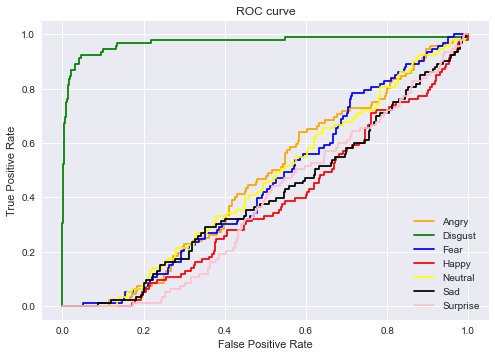

In [64]:
# Here we plot the ROC Curve for each facial expression to represent the rate between the false positive and true negative 
 
y_pred_prob = classifier_lr.predict_proba(X_test)[:, 1]

fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test, y_pred_prob, pos_label=1)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, y_pred_prob, pos_label=2)
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test, y_pred_prob, pos_label=3)
fpr_4, tpr_4, thresholds_4 = metrics.roc_curve(y_test, y_pred_prob, pos_label=4)
fpr_5, tpr_5, thresholds_5 = metrics.roc_curve(y_test, y_pred_prob, pos_label=5)
fpr_6, tpr_6, thresholds_6 = metrics.roc_curve(y_test, y_pred_prob, pos_label=6)
fpr_7, tpr_7, thresholds_7 = metrics.roc_curve(y_test, y_pred_prob, pos_label=7)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_1, tpr_1, color='orange', label='Angry')
plt.plot(fpr_2, tpr_2, color='green', label='Disgust')
plt.plot(fpr_3, tpr_3, color='blue', label='Fear')
plt.plot(fpr_4, tpr_4, color='red', label='Happy')
plt.plot(fpr_5, tpr_5, color='yellow', label='Neutral')
plt.plot(fpr_6, tpr_6, color='black', label='Sad')
plt.plot(fpr_7, tpr_7, color='pink', label='Surprise')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

 

We decided to proceed with results from the Logistic Regression Classifier as similar accuracies and scores were obtained also from the other Classifiers.

### Confusion Matrix

In [65]:
# Here we built the confusion matrix which represents how often a class gets identified correctly and how often it gets identified incorrectly
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cnf_matrix

array([[24,  3,  9, 15, 10, 19, 12],
       [ 2, 82,  2,  4,  0,  1,  1],
       [11,  6, 22, 13, 11, 12, 18],
       [17,  3, 11, 36, 12,  7,  7],
       [10,  6,  9, 17, 25, 17,  9],
       [11,  3, 11, 15, 20, 26,  7],
       [ 6,  0, 11, 12,  7,  1, 56]], dtype=int64)

Text(0.5, 352.48, 'Predicted label')

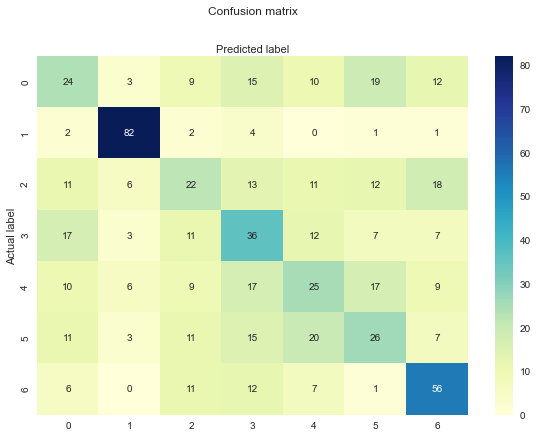

In [66]:
class_names=[1,2,3,4,5,6,7] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Limitations

Initially after proving that our dataset is imbalanced, we performed down sampling, took care of the outliers and even performed feature selection. Despite that, our accuracy is not what we hoped for. We think it can be improved by increasing the number of features but that increases the running time of the algorithms which is not convenient to implement on local systems.

## Future Scope

The future scope of this project could be to implement a Deep Learning CNN model to classify the expressions, and mapping each expression to corresponding emojis or avatars.